In [ ]:
#******************************************************************************************
#******************************************************************************************
#****************************     Linear Reggression     **********************************
#******************************************************************************************
#******************************************************************************************

In [ ]:
#Standard Imports
import pandas as pd
import numpy as np
from sklearn import preprocessing as pre
import os

In [349]:
#Read in data set
#change path to location of data files on your pc
os.chdir('C:/Users/saust/OneDrive - Louisiana State University/2. IE7429/Term Project/')  
df =  pd.read_csv('ConditionMonitoring.csv') 

In [350]:
#******************************************************************************************
#******************************************************************************************
#*************************     CHARACTERIZE THE DATA     **********************************
#******************************************************************************************
#******************************************************************************************

In [351]:
print('Basic info about the dataframe and its rows and columns:')
print()
df.info()

Basic info about the dataframe and its rows and columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxigen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acethylene           470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-nul

In [352]:
print("Number of unique values for all columns:")
df.nunique(axis=0)

Number of unique values for all columns:


Hydrogen               111
Oxigen                 382
Nitrogen               317
Methane                 74
CO                     298
CO2                    374
Ethylene                61
Ethane                 141
Acethylene              26
DBDS                    57
Power factor           172
Interfacial V           29
Dielectric rigidity     41
Water content           63
Health index            65
dtype: int64

In [353]:
print('Data Preview')
df.head()

Data Preview


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,2845,5860,27842,7406,32,1344,16684,5467,7,19.0,1.00,45,55,0,95.2
1,12886,61,25041,877,83,864,4,305,0,45.0,1.00,45,55,0,85.5
2,2820,16400,56300,144,257,1080,206,11,2190,1.0,1.00,39,52,11,85.3
3,1099,70,37520,545,184,1402,6,230,0,87.0,4.58,33,49,5,85.3
4,3210,3570,47900,160,360,2130,4,43,4,1.0,0.77,44,55,3,85.2


In [354]:
print('Summary statistics for all numerical columns:')
df.describe()

Summary statistics for all numerical columns:


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,404.261702,8357.372340,47759.561702,79.695745,244.000000,1816.414894,162.923404,81.940426,91.491489,17.036596,1.849043,38.434043,53.495745,16.282979,27.504043
std,2002.142678,14164.233283,13760.451816,489.320336,237.267485,2256.790519,1323.811504,342.573636,644.365828,46.735057,6.144009,6.178830,6.458906,17.115646,17.741458
min,0.000000,57.000000,3600.000000,0.000000,10.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.050000,21.000000,27.000000,0.000000,13.400000
25%,4.000000,496.000000,41700.000000,2.000000,66.000000,641.750000,0.000000,0.000000,0.000000,0.000000,0.570000,32.000000,51.000000,5.000000,13.400000
50%,9.000000,3810.000000,49100.000000,3.000000,150.500000,1125.000000,3.000000,4.000000,0.000000,0.000000,1.000000,39.000000,54.000000,12.000000,13.400000
75%,34.000000,14875.000000,55875.000000,7.000000,361.750000,2257.500000,6.000000,69.750000,0.000000,2.000000,1.000000,44.000000,56.000000,21.000000,38.550000
max,23349.000000,249900.000000,85300.000000,7406.000000,1730.000000,24900.000000,16684.000000,5467.000000,9740.000000,227.000000,73.200000,57.000000,75.000000,183.000000,95.200000


In [355]:
print('Range of all columns')
df.max()-df.min()

Range of all columns


Hydrogen                23349.00
Oxigen                 249843.00
Nitrogen                81700.00
Methane                  7406.00
CO                       1720.00
CO2                     24852.00
Ethylene                16684.00
Ethane                   5467.00
Acethylene               9740.00
DBDS                      227.00
Power factor               73.15
Interfacial V              36.00
Dielectric rigidity        48.00
Water content             183.00
Health index               81.80
dtype: float64

In [356]:
print("Duplicate rows:")
df[df.duplicated(keep=False)]

Duplicate rows:


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index


Histograms of Each Field


array([[<AxesSubplot:title={'center':'Hydrogen'}>,
        <AxesSubplot:title={'center':'Oxigen'}>,
        <AxesSubplot:title={'center':'Nitrogen'}>,
        <AxesSubplot:title={'center':'Methane'}>],
       [<AxesSubplot:title={'center':'CO'}>,
        <AxesSubplot:title={'center':'CO2'}>,
        <AxesSubplot:title={'center':'Ethylene'}>,
        <AxesSubplot:title={'center':'Ethane'}>],
       [<AxesSubplot:title={'center':'Acethylene'}>,
        <AxesSubplot:title={'center':'DBDS'}>,
        <AxesSubplot:title={'center':'Power factor'}>,
        <AxesSubplot:title={'center':'Interfacial V'}>],
       [<AxesSubplot:title={'center':'Dielectric rigidity'}>,
        <AxesSubplot:title={'center':'Water content'}>,
        <AxesSubplot:title={'center':'Health index'}>, <AxesSubplot:>]],
      dtype=object)

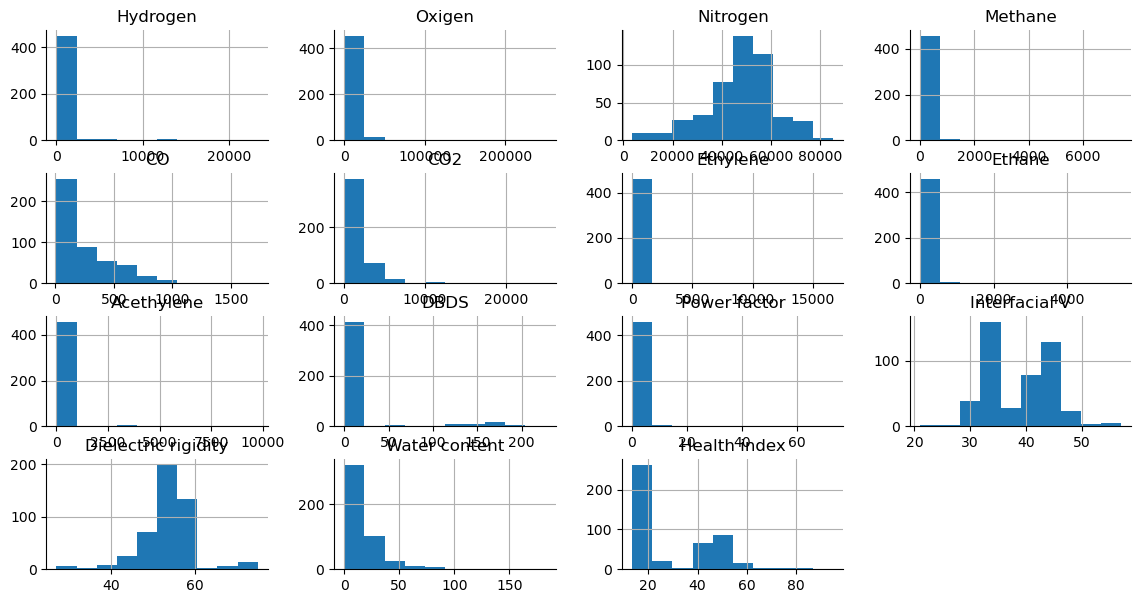

In [357]:
print("Histograms of Each Field")
df.hist()

In [358]:
print('Identify skews in Histograms')
df.mode()

Identify skews in Histograms


,Hydrogen,Oxigen,Nitrogen,Methane,CO,CO2,Ethylene,Ethane,Acethylene,DBDS,Power factor,Interfacial V,Dielectric rigidity,Water content,Health index
0,0,15700,56700,2,54,2750,0,0,0,0.0,1.0,32,55,4,13.4


In [359]:
#******************************************************************************************
#******************************************************************************************
#****************************     PREPARE THE DATA     ************************************
#******************************************************************************************
#******************************************************************************************

In [360]:
#Correct Field Spelling
df = df.rename(columns={"Oxigen":"Oxygen",'Acethylene':'Acetylene'})
print("Verify Rename:")
df.info()


Verify Rename:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hydrogen             470 non-null    int64  
 1   Oxygen               470 non-null    int64  
 2   Nitrogen             470 non-null    int64  
 3   Methane              470 non-null    int64  
 4   CO                   470 non-null    int64  
 5   CO2                  470 non-null    int64  
 6   Ethylene             470 non-null    int64  
 7   Ethane               470 non-null    int64  
 8   Acetylene            470 non-null    int64  
 9   DBDS                 470 non-null    float64
 10  Power factor         470 non-null    float64
 11  Interfacial V        470 non-null    int64  
 12  Dielectric rigidity  470 non-null    int64  
 13  Water content        470 non-null    int64  
 14  Health index         470 non-null    float64
dtypes: float64(3), int64(12)


In [361]:
#Normalization

dfNoHI = df.loc[:]
col_names =  dfNoHI.columns 
dfNoHI[col_names] = pd.DataFrame(pre.StandardScaler().fit_transform(pd.DataFrame(dfNoHI[col_names])))  



df = dfNoHI



In [362]:
#Correlation Matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

#create correlation matrix
dfCorrM = df.corr()

#stregnth of correlations
out_HI=dfCorrM[["Health index"]]
out_HI=out_HI.apply(abs)
out_HI.sort_values(by="Health index",inplace=True, ascending=False)

print(out_HI)

                     Health index
Health index             1.000000
DBDS                     0.468809
Interfacial V            0.400216
Hydrogen                 0.377388
Methane                  0.361770
Water content            0.281165
Ethylene                 0.271504
Acetylene                0.240143
Ethane                   0.236507
CO2                      0.168777
Oxygen                   0.121009
CO                       0.112751
Dielectric rigidity      0.104426
Power factor             0.092729
Nitrogen                 0.089455


In [363]:
from sklearn.model_selection import train_test_split
f = df.drop(columns=['Health index'])
t = df['Health index']
f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.2)
df_train = pd.concat([f_train,t_train],axis=1)
df_test = pd.concat([f_test,t_test],axis=1)

#Save preprocessed dataset to an Excel file (in separate sheets)
with pd.ExcelWriter('C:/Users/saust/OneDrive/Desktop/results.xlsx') as writer:  
    df_train.to_excel(writer,'Train')
    df_test.to_excel(writer,'Test')
    


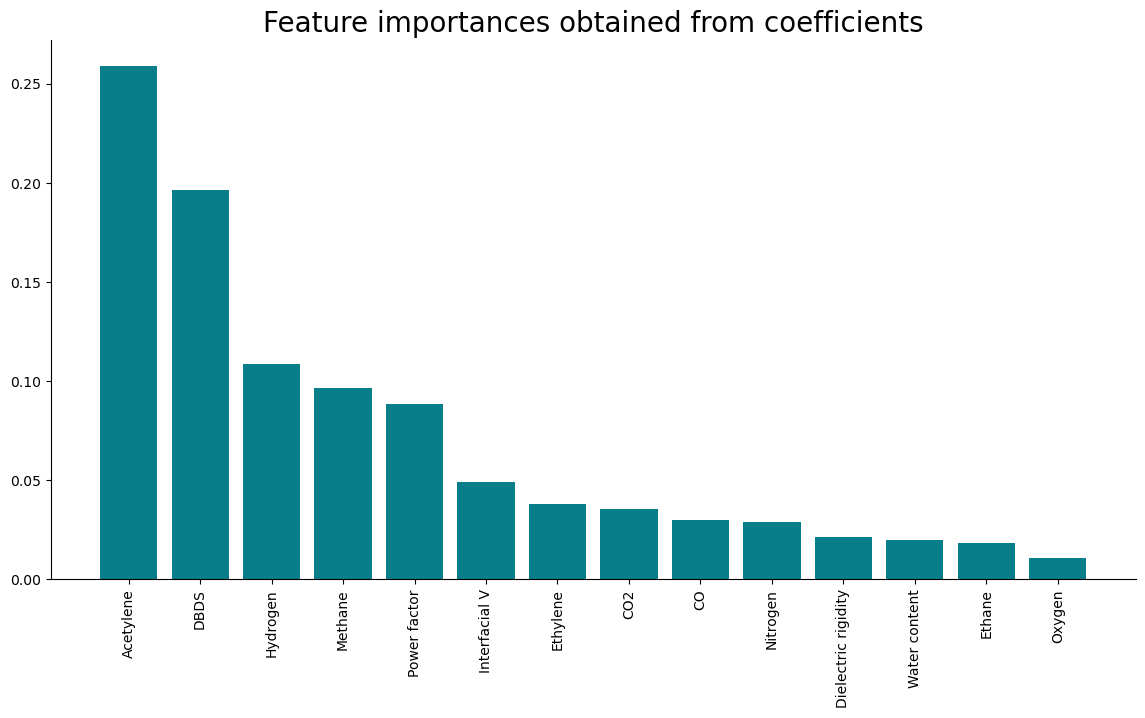

In [364]:
X = df.drop(columns=['Health index'])
Y = df['Health index']

X = X.astype(int)
Y = Y.astype(int)


#Train the classifier.

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X,Y)

#Extract importance for each feature (Attribute) from trained model
importances = pd.DataFrame(data={
    'Attribute': X.columns,
    'Importance': model.feature_importances_})

#sort by importance in descending order, and plot
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()


In [365]:
dfReg = df.drop(columns=['Dielectric rigidity', 'Power factor','Nitrogen'])

In [366]:
#******************************************************************************************
#******************************************************************************************
#****************************     TRAIN THE MACHINE     ***********************************
#******************************************************************************************
#******************************************************************************************

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [367]:
train = dfReg.sample(frac=0.80, random_state=125)

In [368]:
test = dfReg.drop(train.index)

In [369]:
x = train.drop(columns=['Health index'])

In [370]:
y = train[["Health index"]]

In [371]:
x = sm.add_constant(x)

In [372]:
model = sm.OLS(y,x).fit()

In [373]:
xtest = test.drop(columns=['Health index'])

In [374]:
xtest = sm.add_constant(xtest)

In [375]:
ytest = test[["Health index"]]

In [376]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Health index   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     34.10
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           1.53e-49
Time:                        18:50:40   Log-Likelihood:                -409.78
No. Observations:                 376   AIC:                             843.6
Df Residuals:                     364   BIC:                             890.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0485      0.038      1.282      0.201      -0.026       0.123
Hydrogen          0.1884      0.055      3.411      0.001       0.080       0.297
Oxygen            0.0509      0.039      1.302      0.194      -0.026       0.128
Methane           0.3859      0.127      3.044      0.003       0.137       0.635
CO                0.0023      0.045      0.050      0.960      -0.086       0.090
CO2               0.1030      0.043      2.397      0.017       0.018       0.187
Ethylene         -0.0153      0.059     -0.258      0.797      -0.132       0.101
Ethane           -0.2131      0.104     -2.051      0.041      -0.417      -0.009
Acetylene         0.1495      0.060      2.508      0.013       0.032       0.267
DBDS              0.4226      0.040     10.526      0.000       0.344       0.502
Interfacial V     0.2162      0.045      4.827      0.000       0.128       0.304
Water content    -0.0758      0.042     -1.806      0.072      -0.158       0.007
==============================================================================
Omnibus:                       34.003   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.286
Skew:                           0.559   Prob(JB):                     1.34e-13
Kurtosis:                       4.591   Cond. No.                         8.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [384]:
ypredictions=pd.DataFrame()

In [387]:
ypredictions["prediction"] = model.predict(xtest)

In [388]:
ycompare=pd.merge(ytest, ypredictions, left_index=True, right_index=True)

In [389]:
ycompare.head()

,Health index,prediction
17,1.861804,3.645380
20,1.861804,0.907645
31,1.353977,-0.476364
35,1.308837,1.780751
41,1.308837,0.442126


In [390]:
ycompare["difference"]=abs(ycompare["Health index"]-ycompare["prediction"])

In [391]:
ycompare["difference"].describe()

count    94.000000
mean      0.512549
std       0.372977
min       0.002525
25%       0.257657
50%       0.431484
75%       0.834646
max       1.830341
Name: difference, dtype: float64